In [1]:
import torch
import matplotlib.pyplot as plt
from utils import Truss

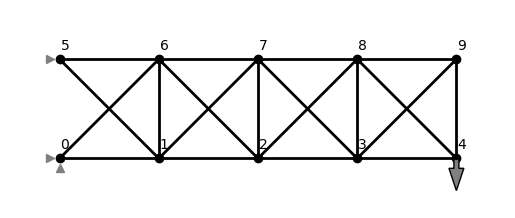

In [6]:
x1 = torch.linspace(0.0, 4.0, 5)
x2 = torch.linspace(0.0, 1.0, 2)
x1_nodes, x2_nodes = torch.stack(torch.meshgrid(x1, x2, indexing="xy"))
nodes = torch.stack([x1_nodes.ravel(), x2_nodes.ravel()], dim=1)

elements = torch.tensor(
    [
        [0, 1],
        [1, 2],
        [2, 3],
        [3, 4],
        [5, 6],
        [6, 7],
        [7, 8],
        [8, 9],
        [1, 5],
        [0, 6],
        [2, 6],
        [1, 7],
        [3, 7],
        [2, 8],
        [4, 8],
        [3, 9],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9],
    ]
)

forces = torch.zeros_like(nodes)
forces[4, 1] = -0.1
constraints = torch.zeros_like(nodes, dtype=bool)
constraints[0,0] = True
constraints[0,1] = True
constraints[5,0] = True
E = torch.ones((len(elements)))
A = 10*torch.ones((len(elements)))


truss_sample = Truss(nodes, elements, forces, constraints)
u, sigma = truss_sample.solve(E, A)
truss_sample.plot()
plt.savefig("figures/truss_sample.pdf", bbox_inches="tight")
plt.show()


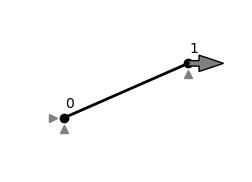

In [3]:
nodes = torch.tensor([[0.0, 0.0], [1.0, 0.5]])
elements = torch.tensor([[0, 1]])
forces = torch.zeros_like(nodes)
forces[1, 0] = 0.1
constraints = torch.ones_like(nodes, dtype=bool)
constraints[1, 0] = False
E = torch.ones((len(elements)))
A = torch.ones((len(elements)))

plt.figure(figsize=(3, 3))
single_truss = Truss(nodes, elements, forces, constraints)
u, sigma = single_truss.solve(E, A)
single_truss.plot(u=u)
plt.savefig("figures/single_truss.pdf", bbox_inches="tight")
plt.show()


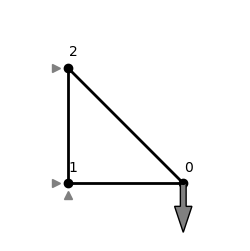

In [5]:
nodes = torch.tensor([[1.0, 0.0], [0.0, 0.0], [0.0, 1.0]])
elements = torch.tensor([[0, 1], [0, 2], [1, 2]])
forces = torch.zeros_like(nodes)
forces[0, 1] = -0.2
constraints = torch.zeros_like(nodes, dtype=bool)
constraints[1,0] = True
constraints[1,1] = True
constraints[2,0] = True
E = 10 * torch.ones((len(elements)))
A = torch.ones((len(elements)))

plt.figure(figsize=(3, 3))
three_bar_truss = Truss(nodes, elements, forces, constraints=constraints)
u, sigma = three_bar_truss.solve(E, A)
three_bar_truss.plot()
plt.savefig("figures/three_bar_truss.pdf", bbox_inches="tight")
plt.show()
